In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('serie-a_com-ano.csv')  # Exemplo de como seu DataFrame pode ser criado a partir de um CSV

In [3]:

# Calcular o saldo de gols para cada partida
df['saldo_gols_mandante'] = df['gols_mandante'] - df['gols_visitante']
df['saldo_gols_visitante'] = df['gols_visitante'] - df['gols_mandante']

# Adicionar colunas para os saldos acumulados
df['saldo_acumulado_mandante'] = 0
df['saldo_acumulado_visitante'] = 0

# Função para atualizar o saldo acumulado e resetar no início de cada ano
def atualizar_saldo_reset(row, saldos_acumulados, current_year):
    if row['ano_campeonato'] != current_year[0]:
        current_year[0] = row['ano_campeonato']
        for team in saldos_acumulados:
            saldos_acumulados[team] = 0

    saldos_acumulados[row['time_mandante']] += row['saldo_gols_mandante']
    saldos_acumulados[row['time_visitante']] += row['saldo_gols_visitante']
    row['saldo_acumulado_mandante'] = saldos_acumulados[row['time_mandante']]
    row['saldo_acumulado_visitante'] = saldos_acumulados[row['time_visitante']]
    return row

In [4]:
# Função para atualizar o saldo acumulado e resetar no início de cada ano
def atualizar_saldo_reset(row, saldos_acumulados, current_year):
    if row['ano_campeonato'] != current_year[0]:
        current_year[0] = row['ano_campeonato']
        for team in saldos_acumulados:
            saldos_acumulados[team] = 0

    saldos_acumulados[row['time_mandante']] += row['saldo_gols_mandante']
    saldos_acumulados[row['time_visitante']] += row['saldo_gols_visitante']
    row['saldo_acumulado_mandante'] = saldos_acumulados[row['time_mandante']]
    row['saldo_acumulado_visitante'] = saldos_acumulados[row['time_visitante']]
    return row

# Aplicar a função ao DataFrame, ordenando por ano e rodada para garantir a ordem correta
current_year = [None]
saldos_acumulados = {team: 0 for team in pd.unique(df[['time_mandante', 'time_visitante']].values.ravel('K'))}
df = df.sort_values(by=['ano_campeonato', 'rodada']).apply(atualizar_saldo_reset, axis=1, args=(saldos_acumulados, current_year))

# Filtrar pelo São Paulo no ano de 2017
sao_paulo_2017 = df[(df['ano_campeonato'] == 2017) & 
                    ((df['time_mandante'] == 'São Paulo') | (df['time_visitante'] == 'São Paulo'))]

# Selecionar e exibir as colunas relevantes
sao_paulo_2017 = sao_paulo_2017[['rodada', 'time_mandante', 'time_visitante', 
                                 'saldo_acumulado_mandante', 'saldo_acumulado_visitante']]

# Renomear as colunas para facilitar a visualização
sao_paulo_2017['saldo_acumulado'] = sao_paulo_2017.apply(
    lambda row: row['saldo_acumulado_mandante'] if row['time_mandante'] == 'São Paulo' else row['saldo_acumulado_visitante'], 
    axis=1)

# Filtrar apenas as colunas desejadas
sao_paulo_2017 = sao_paulo_2017[['rodada', 'saldo_acumulado']]

# Ordenar por rodada (opcional, se necessário)
sao_paulo_2017 = sao_paulo_2017.sort_values(by='rodada')

# Visualizar o resultado
print(sao_paulo_2017)

     rodada  saldo_acumulado
299       1             -1.0
268       2              1.0
269       3              3.0
189       4              2.0
270       5              4.0
87        6              3.0
285       7              3.0
271       8              2.0
52        9              1.0
272      10              1.0
127      11             -1.0
160      12             -2.0
273      13             -2.0
7        14             -4.0
274      15             -3.0
275      16             -3.0
256      17             -2.0
276      18             -3.0
36       19             -4.0
277      20             -3.0
215      21             -3.0
28       22             -5.0
278      23             -5.0
149      24             -4.0
279      25             -4.0
280      26             -3.0
182      27             -4.0
361      28             -3.0
241      29             -5.0
362      30             -3.0
363      31             -2.0
110      32             -1.0
364      33             -1.0
122      34   

In [ ]:
# Aplicar a função ao DataFrame, ordenando por ano e rodada para garantir a ordem correta
current_year = [None]
saldos_acumulados = {team: 0 for team in pd.unique(df[['time_mandante', 'time_visitante']].values.ravel('K'))}
df = df.sort_values(by=['ano_campeonato', 'rodada']).apply(atualizar_saldo_reset, axis=1, args=(saldos_acumulados, current_year))

# Filtrar pelo São Paulo no ano de 2017
sao_paulo_2017 = df[(df['ano_campeonato'] == 2017) & 
                    ((df['time_mandante'] == 'São Paulo') | (df['time_visitante'] == 'São Paulo'))]

# Selecionar e exibir as colunas relevantes
sao_paulo_2017 = sao_paulo_2017[['rodada', 'time_mandante', 'time_visitante', 
                                 'saldo_acumulado_mandante', 'saldo_acumulado_visitante']]

# Renomear as colunas para facilitar a visualização
sao_paulo_2017['saldo_acumulado'] = sao_paulo_2017.apply(
    lambda row: row['saldo_acumulado_mandante'] if row['time_mandante'] == 'São Paulo' else row['saldo_acumulado_visitante'], 
    axis=1)

# Filtrar apenas as colunas desejadas
sao_paulo_2017 = sao_paulo_2017[['rodada', 'saldo_acumulado']]

# Ordenar por rodada (opcional, se necessário)
sao_paulo_2017 = sao_paulo_2017.sort_values(by='rodada')

# Visualizar o resultado
print(sao_paulo_2017)

In [6]:
df.to_csv('df_saldos_acumulados.csv', index=False)

In [ ]:

# Aplicar a função ao DataFrame, ordenando por ano e rodada para garantir a ordem correta
current_year = [None]
saldos_acumulados = {team: 0 for team in pd.unique(df[['time_mandante', 'time_visitante']].values.ravel('K'))}
df = df.sort_values(by=['ano_campeonato', 'rodada']).apply(atualizar_saldo_reset, axis=1, args=(saldos_acumulados, current_year))

# Filtrar pelo ano de 2009
ano_2009 = df[df['ano_campeonato'] == 2009]

# Selecionar e exibir as colunas relevantes
ano_2009 = ano_2009[['rodada', 'time_mandante', 'time_visitante', 
                     'saldo_acumulado_mandante', 'saldo_acumulado_visitante']]

# Adicionar coluna para o saldo acumulado do mandante e do visitante
ano_2009['saldo_acumulado_mandante'] = ano_2009.apply(
    lambda row: row['saldo_acumulado_mandante'] if row['time_mandante'] else 0, axis=1)
ano_2009['saldo_acumulado_visitante'] = ano_2009.apply(
    lambda row: row['saldo_acumulado_visitante'] if row['time_visitante'] else 0, axis=1)

# Salvar o resultado em um arquivo CSV
ano_2009.to_csv('ano_2009_saldos_acumulados.csv', index=False)

# Visualizar o resultado
print(ano_2009)

In [ ]:
# Aplicar a função ao DataFrame, ordenando por ano e rodada para garantir a ordem correta
current_year = [None]
saldos_acumulados = {team: 0 for team in pd.unique(df[['time_mandante', 'time_visitante']].values.ravel('K'))}
df = df.sort_values(by=['ano_campeonato', 'rodada']).apply(atualizar_saldo_reset, axis=1, args=(saldos_acumulados, current_year))

# Filtrar pelo Náutico no ano de 2009
nautico_2009 = df[(df['ano_campeonato'] == 2009) & 
                  ((df['time_mandante'] == 'Náutico') | (df['time_visitante'] == 'Náutico'))]

# Selecionar e exibir as colunas relevantes
nautico_2009 = nautico_2009[['rodada', 'time_mandante', 'time_visitante', 
                             'saldo_acumulado_mandante', 'saldo_acumulado_visitante']]

# Renomear as colunas para facilitar a visualização
nautico_2009['saldo_acumulado'] = nautico_2009.apply(
    lambda row: row['saldo_acumulado_mandante'] if row['time_mandante'] == 'Náutico' else row['saldo_acumulado_visitante'], 
    axis=1)

# Filtrar apenas as colunas desejadas
nautico_2009 = nautico_2009[['rodada', 'saldo_acumulado']]

# Ordenar por rodada (opcional, se necessário)
nautico_2009 = nautico_2009.sort_values(by='rodada')

# Salvar o resultado em um arquivo CSV
nautico_2009.to_csv('nautico_2009_saldo.csv', index=False)

# Visualizar o resultado
print(nautico_2009)

In [21]:
def calcular_media_gols_por_partida(df):
    # Calcular o saldo de gols para cada partida
    df['saldo_gols_mandante'] = df['gols_mandante'] - df['gols_visitante']
    df['saldo_gols_visitante'] = df['gols_visitante'] - df['gols_mandante']

    # Adicionar colunas para os saldos acumulados e o número de partidas jogadas
    df['saldo_acumulado_mandante'] = 0
    df['saldo_acumulado_visitante'] = 0
    df['partidas_jogadas_mandante'] = 0
    df['partidas_jogadas_visitante'] = 0

    # Adicionar colunas para as médias de gols por partida
    df['media_gols_mandante'] = 0
    df['media_gols_visitante'] = 0

    # Função para atualizar o saldo acumulado, o número de partidas jogadas e as médias de gols,
    # resetando no início de cada ano
    def atualizar_saldo_partidas_e_media_gols(row, saldos_acumulados, partidas_jogadas, medias_gols, current_year):
        if row['ano_campeonato'] != current_year[0]:
            current_year[0] = row['ano_campeonato']
            for team in saldos_acumulados:
                saldos_acumulados[team] = 0
                partidas_jogadas[team] = 0
                medias_gols[team] = 0

        saldos_acumulados[row['time_mandante']] += row['saldo_gols_mandante']
        saldos_acumulados[row['time_visitante']] += row['saldo_gols_visitante']
        row['saldo_acumulado_mandante'] = saldos_acumulados[row['time_mandante']]
        row['saldo_acumulado_visitante'] = saldos_acumulados[row['time_visitante']]

        partidas_jogadas[row['time_mandante']] += 1
        partidas_jogadas[row['time_visitante']] += 1
        row['partidas_jogadas_mandante'] = partidas_jogadas[row['time_mandante']]
        row['partidas_jogadas_visitante'] = partidas_jogadas[row['time_visitante']]

        # Calcular as médias de gols por partida
        if partidas_jogadas[row['time_mandante']] != 0:
            medias_gols[row['time_mandante']] = row['saldo_acumulado_mandante'] / partidas_jogadas[row['time_mandante']]
        if partidas_jogadas[row['time_visitante']] != 0:
            medias_gols[row['time_visitante']] = row['saldo_acumulado_visitante'] / partidas_jogadas[row['time_visitante']]

        row['media_gols_mandante'] = medias_gols[row['time_mandante']]
        row['media_gols_visitante'] = medias_gols[row['time_visitante']]

        return row

    # Aplicar a função ao DataFrame, ordenando por ano e rodada para garantir a ordem correta
    current_year = [None]
    saldos_acumulados = {team: 0 for team in pd.unique(df[['time_mandante', 'time_visitante']].values.ravel('K'))}
    partidas_jogadas = {team: 0 for team in pd.unique(df[['time_mandante', 'time_visitante']].values.ravel('K'))}
    medias_gols = {team: 0 for team in pd.unique(df[['time_mandante', 'time_visitante']].values.ravel('K'))}
    df = df.sort_values(by=['ano_campeonato', 'rodada']).apply(atualizar_saldo_partidas_e_media_gols, axis=1, args=(saldos_acumulados, partidas_jogadas, medias_gols, current_year))

    return df

In [22]:
# Supondo que seu DataFrame se chame df
# df = pd.read_csv('seu_arquivo.csv')  # Exemplo de como seu DataFrame pode ser criado a partir de um CSV

# Aplicar a função ao DataFrame
df_com_media_gols = calcular_media_gols_por_partida(df)

# Visualizar o DataFrame resultante
print(df_com_media_gols)

      ano_campeonato  rodada                                     estadio  \
805             2007       1              Estádio Durival Britto e Silva   
834             2007       1              Estádio Jornalista Mário Filho   
850             2007       1              Estádio Jornalista Mário Filho   
886             2007       1           Estádio Adelmar da Costa Carvalho   
938             2007       1          Estádio Governador Magalhães Pinto   
...              ...     ...                                         ...   
5527            2023      29                        Estádio São Januário   
5538            2023      29                             Arena do Grêmio   
5542            2023      29                                 Ligga Arena   
5553            2023      29                     Estádio Nabi Abi Chedid   
5579            2023      29  Estádio General Sylvio Raulino de Oliveira   

                           arbitro  publico  time_mandante time_visitante  \
805       

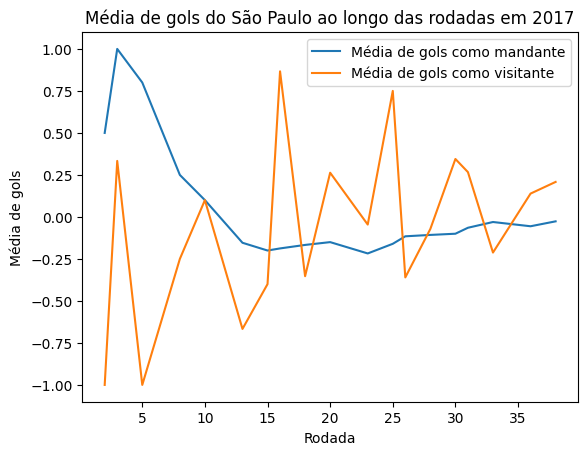

In [23]:

# Isolar os dados do São Paulo em 2017
sp_2017 = df_com_media_gols[(df_com_media_gols['time_mandante'] == 'São Paulo') & (df_com_media_gols['ano_campeonato'] == 2017)]

# Visualizar a média de gols ao longo das rodadas
import matplotlib.pyplot as plt

plt.plot(sp_2017['rodada'], sp_2017['media_gols_mandante'], label='Média de gols como mandante')
plt.plot(sp_2017['rodada'], sp_2017['media_gols_visitante'], label='Média de gols como visitante')
plt.xlabel('Rodada')
plt.ylabel('Média de gols')
plt.title('Média de gols do São Paulo ao longo das rodadas em 2017')
plt.legend()
plt.show()

In [24]:
# Supondo que df_com_media_gols seja o DataFrame resultante da função calcular_media_gols_por_partida

# Isolar os dados do São Paulo em 2017
sp_2017 = df_com_media_gols[(df_com_media_gols['time_mandante'] == 'São Paulo') & (df_com_media_gols['ano_campeonato'] == 2017)]

# Selecionar as colunas relevantes para visualização
sp_2017_visualizacao = sp_2017[['rodada', 'media_gols_mandante', 'media_gols_visitante']]

# Renomear as colunas para uma melhor compreensão
sp_2017_visualizacao = sp_2017_visualizacao.rename(columns={'media_gols_mandante': 'Média de gols (Mandante)', 'media_gols_visitante': 'Média de gols (Visitante)'})

# Exibir a tabela
print(sp_2017_visualizacao)

     rodada  Média de gols (Mandante)  Média de gols (Visitante)
268       2                  0.500000                  -1.000000
269       3                  1.000000                   0.333333
270       5                  0.800000                  -1.000000
271       8                  0.250000                  -0.250000
272      10                  0.100000                   0.100000
273      13                 -0.153846                  -0.666667
274      15                 -0.200000                  -0.400000
275      16                 -0.187500                   0.866667
276      18                 -0.166667                  -0.352941
277      20                 -0.150000                   0.263158
278      23                 -0.217391                  -0.045455
279      25                 -0.160000                   0.750000
280      26                 -0.115385                  -0.360000
361      28                 -0.107143                  -0.071429
362      30              

In [40]:
# Especificar o caminho do arquivo CSV de destino
caminho_arquivo_csv = 'dados_preprocessados.csv'

# Exportar o DataFrame para o arquivo CSV e imprimir uma mensagem de sucesso
df_com_media_gols.to_csv(caminho_arquivo_csv, index=False)
print(f"DataFrame exportado para '{caminho_arquivo_csv}' com sucesso!")

DataFrame exportado para 'dados_preprocessados.csv' com sucesso!


In [41]:

# Isolar os dados do São Paulo em 2018
sp_2018 = df_com_media_gols[(df_com_media_gols['time_mandante'] == 'São Paulo') & (df_com_media_gols['ano_campeonato'] == 2018)]

# Selecionar as colunas relevantes para visualização
sp_2018_visualizacao = sp_2018[['rodada', 'media_gols_mandante', 'media_gols_visitante']]

# Renomear as colunas para uma melhor compreensão
sp_2018_visualizacao = sp_2018_visualizacao.rename(columns={'media_gols_mandante': 'Média de gols (Mandante)', 'media_gols_visitante': 'Média de gols (Visitante)'})

# Exibir a tabela
print(sp_2018_visualizacao)

      rodada  Média de gols (Mandante)  Média de gols (Visitante)
3216       1                  1.000000                  -1.000000
3217       4                  0.250000                   0.250000
3218       6                  0.333333                  -0.333333
3219       8                  0.625000                  -0.125000
3220      10                  0.300000                   0.400000
3221      12                  0.583333                  -0.583333
3222      14                  0.714286                   0.214286
3411      19                  0.833333                  -0.500000
3465      21                  0.800000                  -0.444444
3344      22                  0.761905                  -0.238095
3466      24                  0.695652                  -0.208333
3345      26                  0.640000                  -0.192308
3509      28                  0.518519                   0.888889
3467      30                  0.413793                   0.400000
3412      